In [25]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

from forward_models import ct
from forward_models import denoising

from data_pips import BSDS

from Framework import adversarial_regulariser
from Framework import positiv_adversarial_regulariser
from Framework import postprocessing
from Framework import iterative_scheme
from Framework import total_variation

import util as ut

from networks import multiscale_l1_classifier

class l1_denoiser(adversarial_regulariser):
    noise_level = 0.1
    mu_default = .3
    learning_rate = 0.0005
    step_size = 1
    total_steps_default = 30

    def get_network(self, size, colors):
        return multiscale_l1_classifier(size=size, colors=colors)

    def get_Data_pip(self):
        return BSDS()

    def get_model(self, size):
        return denoising(size=size)

adv_reg = l1_denoiser()

Training Pictures found: 400
Evaluation Pictures found: 100


No save found


7.45055


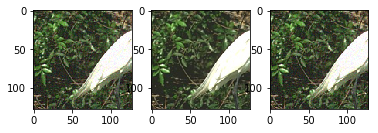

In [66]:
y, x_true, fbp = adv_reg.generate_training_data(1)
y = ut.cut_image(y)
fbp = ut.cut_image(fbp)
plt.figure()
plt.subplot(131)
plt.imshow(y[0,...])
plt.subplot(132)
plt.imshow(x_true[0,...])
plt.subplot(133)
plt.imshow(fbp[0,...])
print(ut.l2_norm(y-x_true))

In [24]:
adv_reg.end()

(16, 128, 128, 1)
-0.238926
0.761074
-3.72529e-09
33.6428


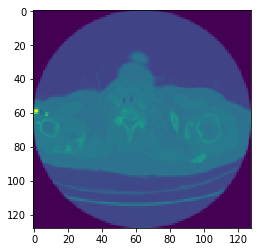

In [5]:
y, x_true, fbp = data.generate_data(16)
pic = x_true
i = 1
print(pic.shape)
print(np.amin(pic[i,...]))
print(np.amax(pic[i,...]))
print(np.average(pic[i,...]))
dif = x_true[i,...,0] - fbp[i,...,0]
print(np.sum(np.square(dif)))
plt.imshow(pic[i,...,0])
plt.show()

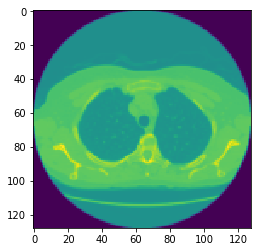

237
0


In [18]:
path = pp.get_random_path()
image = pp.get_pic(path)
plt.figure()
plt.imshow(image)
plt.show()
print(np.amax(image))
print(np.amin(image))

In [13]:
list = pp.find('*.dcm', './Train_Data')
print(len(list))

397


In [15]:
import platform
platform.node()

'LAPTOP-E6AJ1CPF'

In [6]:
import numpy as np
true, cor = denoiser.generate_local_input(128)
recon = np.copy(cor)

In [23]:
var = input("Please enter something: ")
print("You entered " + str(var))

StdinNotImplementedError: raw_input was called, but this frontend does not support input requests.